In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import researchpy as rp

# Line graph of averages per month (Manila)

To get a rough overview of the changes in temperature in 2020 when compared to the average temperatures from 1998 to 2012 per month data from en.climate-data.org as basis.

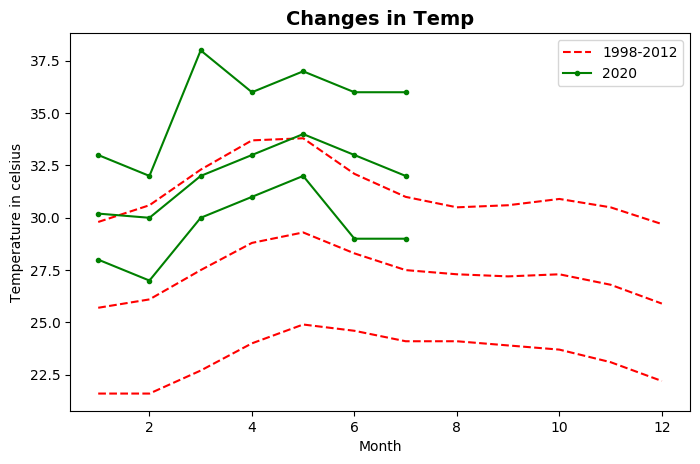

In [19]:
df=pd.read_csv('Manila-Weather-by-month-1982-2012.csv')
sdf=pd.read_csv('Manila-Weather-by-month-2020.csv')

plt.figure(figsize=(8,5),dpi=100)
plt.title('Changes in Temp',fontdict={'fontsize':14, 'fontweight':'bold'})

plt.plot(df.month, df['Avg T 1982-2012'],'r--',label='1998-2012')
plt.plot(df.month, df['Min T 1982-2012'],'r--')
plt.plot(df.month, df['Max T 1982-2012'],'r--')
plt.plot(sdf.month, sdf['Avg T 2020'],'g.-',label='2020')
plt.plot(sdf.month, sdf['Min T 2020'],'g.-')
plt.plot(sdf.month, sdf['Max T 2020'],'g.-')

plt.legend()

plt.xlabel('Month')
plt.ylabel('Temperature in celsius')

plt.xticks=([months])
plt.show()

The graph above shows three lines of two colors; the green line for current 2020 and the red broken line for the average from 1998-2012. the upper line shows the maximum temperatures, the middle line for the average and the lower lines are for minimum temperatures.

# Daily Changes

For a more accurate representation, average daily temperatureData from 1998-2018 were used as comparison.

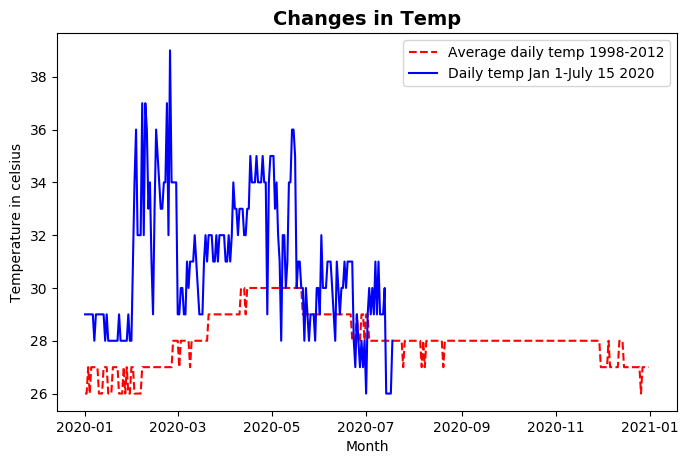

In [86]:
dp=pd.read_csv('1998-2018 temp data.csv')
dp['Date']=pd.to_datetime(dp['Date'])
dpr=pd.read_csv('2020 daily temp.csv')
dpr['Date']=pd.to_datetime(dpr['Date'])

plt.figure(figsize=(8,5),dpi=100)
plt.title('Changes in Temp',fontdict={'fontsize':14, 'fontweight':'bold'})


plt.plot(dp['Date'], dp['Temperature (°C)'],'r--',label='Average daily temp 1998-2012')
plt.plot(dpr['Date'], dpr['Temperature (°C)'],'b-',label='Daily temp Jan 1-July 15 2020')

plt.legend()

plt.xlabel('Month')
plt.ylabel('Temperature in celsius')


plt.show()

## smoothening the graph (weekly average)

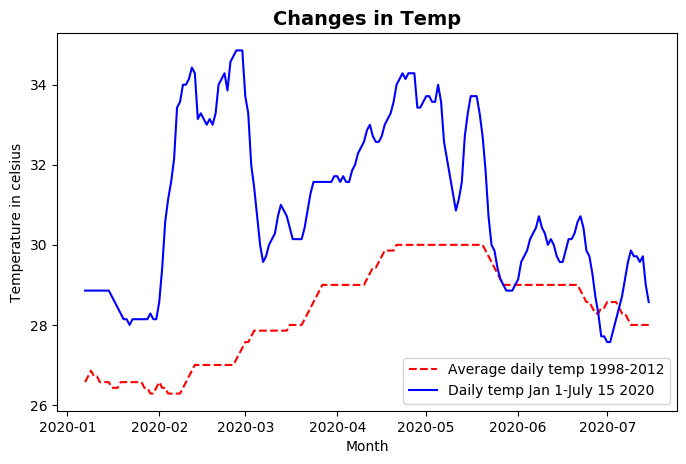

In [102]:
cut_off_date = "2020-07-15"
dp = dp.copy()
dpr = dpr.copy()
dp.sort_values('Date', ascending=True)
dpr.sort_values('Date', ascending=True)

dp= dp[dp['Date'] <= cut_off_date]
dpr= dpr[dpr['Date'] <= cut_off_date]

plt.figure(figsize=(8,5),dpi=100)
plt.title('Changes in Temp',fontdict={'fontsize':14, 'fontweight':'bold'})


plt.plot(dp['Date'], dp['Temperature (°C)'].rolling(window=7).mean(),'r--',label='Average daily temp 1998-2012')
plt.plot(dpr['Date'], dpr['Temperature (°C)'].rolling(window=7).mean(),'b-',label='Daily temp Jan 1-July 15 2020')

plt.legend()

plt.xlabel('Month')
plt.ylabel('Temperature in celsius')


plt.show()

To make the line smoother and the difference clearer to see, the Month-axis is shortened up to only the present. 

# Manila Heatmap

To visually show the distribution of heat 

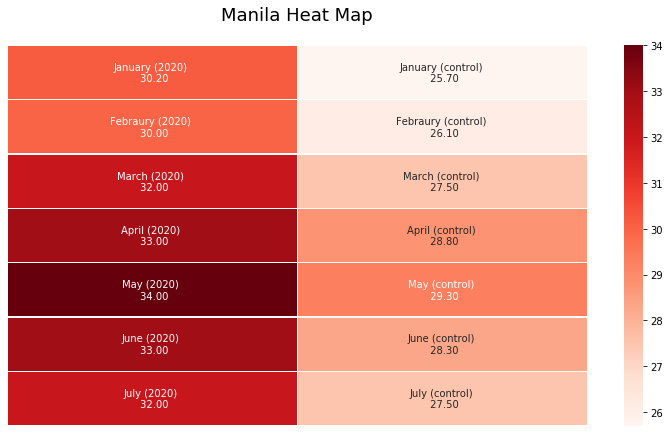

In [14]:
hf = pd.read_csv("Heatmap.csv")
symbol = ((np.asarray(hf['Symbol'])).reshape(7,2))
perchange = ((np.asarray(hf['Change'])).reshape(7,2))
result = hf.pivot(index='Yrows',columns='Xcols',values='Change')
labels = (np.asarray(["{0} \n {1:.2f}".format(symb,value)
                      for symb, value in zip(symbol.flatten(),
                                               perchange.flatten())])
         ).reshape(7,2)
fig, ax = plt.subplots(figsize=(13,7))
title = "Manila Heat Map"
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])
ax.set_xticks([]) 
ax.set_yticks([]) 
ax.axis('off')
sns.heatmap(perchange,annot=labels,fmt="",cmap='Reds',linewidths=0.30,ax=ax)
plt.show()